In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('../../../')

In [3]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

In [4]:
os.getcwd()

'/Users/gbemidebe/Documents/GitHub/monsur'

In [5]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

# The Data

In [6]:
data = pd.read_csv('./data/cleaned_data.csv')
# data = data.drop(columns=['S/N'])
data

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,150,3.5,1.00,14.05,118.71000,0.00,0.00,0.23,0.12,0.00,0.61
1,2,150,3.3,0.80,14.05,107.67720,0.20,0.00,0.23,0.07,0.00,0.66
2,3,150,3.2,0.50,14.05,91.12800,0.50,0.00,0.34,0.05,0.03,0.52
3,4,150,3.1,0.10,14.05,69.06240,0.90,0.01,0.42,0.05,0.02,0.42
4,5,150,3.0,0.05,14.05,66.30420,0.95,0.04,0.48,0.05,0.10,0.19
5,6,150,3.0,0.03,14.05,65.20092,0.97,0.07,0.50,0.05,0.11,0.14
6,7,150,2.8,0.00,14.05,63.54600,1.00,0.15,0.47,0.11,0.06,0.11
7,8,250,4.0,1.00,14.05,118.71000,0.00,0.00,0.22,0.12,0.00,0.63
8,9,250,3.8,0.80,14.05,107.67720,0.20,0.00,0.17,0.10,0.00,0.70
9,10,250,3.7,0.50,14.05,91.12800,0.50,0.02,0.36,0.08,0.02,0.48


In [7]:
features_col = ['S/N', 'cDen', 'Pot', 'Sn %', 'pH', 'weight', 'Cu %']
target_col = ['C2H4', 'CO', 'H2', 'EtoH', 'FORM']

In [8]:
data[features_col[1:]].max()

cDen      450.00
Pot         4.70
Sn %        1.00
pH         14.05
weight    118.71
Cu %        1.00
dtype: float64

In [9]:
data[features_col[1:]] = data[features_col[1:]] / data[features_col[1:]].max()

In [10]:
data.head()

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,0.333333,0.744681,1.00,1.0,1.000000,0.00,0.00,0.23,0.12,0.00,0.61
1,2,0.333333,0.702128,0.80,1.0,0.907061,0.20,0.00,0.23,0.07,0.00,0.66
2,3,0.333333,0.680851,0.50,1.0,0.767652,0.50,0.00,0.34,0.05,0.03,0.52
3,4,0.333333,0.659574,0.10,1.0,0.581774,0.90,0.01,0.42,0.05,0.02,0.42
4,5,0.333333,0.638298,0.05,1.0,0.558539,0.95,0.04,0.48,0.05,0.10,0.19


In [11]:
len(features_col)

7

In [12]:
import numpy as np

def equation_1(pH, cDen):
    a0 = 2.344317535677257e-01
    c0 = -1.682284681966292e-02
    return c0 + a0 * (np.exp(-1.0 * pH) + cDen**6)

def equation_2(Sn, Cu, pH, cDen, Pot):
    a0 = -1.405129507789802e-01
    a1 = 2.692741153477351e-01
    c0 = 3.783296311411321e-01
    return c0 + a0 * (np.cbrt(Sn) + (Cu + pH)) + a1 * (cDen**6 * Pot**3)

def equation_3(Sn, Cu, pH, cDen, Pot):
    a0 = 3.324053803592641e-01
    a1 = -1.566222699334490e-01
    a2 = 2.558454001967528e-01
    c0 = 3.886868305202099e-01
    return c0 + a0 * (np.abs(np.sin(cDen) - (Pot * cDen))) + a1 * (np.cbrt(Sn) + (Cu + pH)) + a2 * (cDen**6 * Pot**3)

def equation_4(Sn, Cu, Pot, pH, cDen):
    a0 = 8.129949672597807e-02
    a1 = 6.571512003508552e-01
    a2 = -1.630455480912119e-01
    a3 = 1.829885482759683e-01
    c0 = 1.354139158087003e-02
    return c0 + a0 * np.abs(np.sin(cDen) - (Pot**2)) + a1 * np.abs(np.sin(cDen) - (Pot * cDen)) + a2 * (np.cbrt(Sn) + (Cu - Pot)) + a3 * (np.exp(-1.0 * pH) + cDen**6)

def equation_5(Sn, Cu, Pot, pH, cDen):
    a0 = 5.867855528064494e+00
    a1 = 6.628222119754068e-02
    a2 = 6.770431299553874e-01
    a3 = -2.273006537236286e-01
    a4 = 1.700237916841184e-01
    c0 = 3.383978964283785e-02
    return c0 + a0 * (Sn**2 * Cu**6) + a1 * np.abs((Pot - cDen) - (Cu * Sn)) + a2 * np.abs(np.sin(cDen) - (Pot * cDen)) + a3 * (np.cbrt(Sn) + (Cu - Pot)) + a4 * (np.exp(-1.0 * pH) + cDen**6)

def equation_6(Sn, Cu, Pot, pH, cDen, weight):
    a0 = 1.863778473177432e-02
    a1 = 5.910962254915521e+00
    a2 = 4.228183481178416e-02
    a3 = 7.127487610097909e-01
    a4 = -2.265716650451252e-01
    a5 = 1.669467979327007e-01
    c0 = 2.992789562320270e-02
    return c0 + a0 * np.abs((cDen**3) - np.abs(Cu - weight)) + a1 * (Sn**2 * Cu**6) + a2 * np.abs((Pot / pH) - np.cbrt(weight)) + a3 * np.abs(np.sin(cDen) - (Pot * cDen)) + a4 * (np.cbrt(Sn) + (Cu - Pot)) + a5 * (np.exp(-1.0 * pH) + cDen**6)


In [13]:
data['H2_pred_1'] = equation_1(data['pH'], data['cDen'])
data['H2_pred_2'] = equation_2(data['Sn %'], data['Cu %'], data['pH'], data['cDen'], data['Pot'])
data['H2_pred_3'] = equation_3(data['Sn %'], data['Cu %'], data['pH'], data['cDen'], data['Pot'])
data['H2_pred_4'] = equation_4(data['Sn %'], data['Cu %'], data['Pot'], data['pH'], data['cDen'])
data['H2_pred_5'] = equation_5(data['Sn %'], data['Cu %'], data['Pot'], data['pH'], data['cDen'])
data['H2_pred_6'] = equation_6(data['Sn %'], data['Cu %'], data['Pot'], data['pH'], data['cDen'], data['weight'])


In [14]:
def percentage_mae(y_true, y_pred):

    return np.mean(np.abs(y_true - y_pred)) * 100

In [15]:
from src.plotter import plot_data

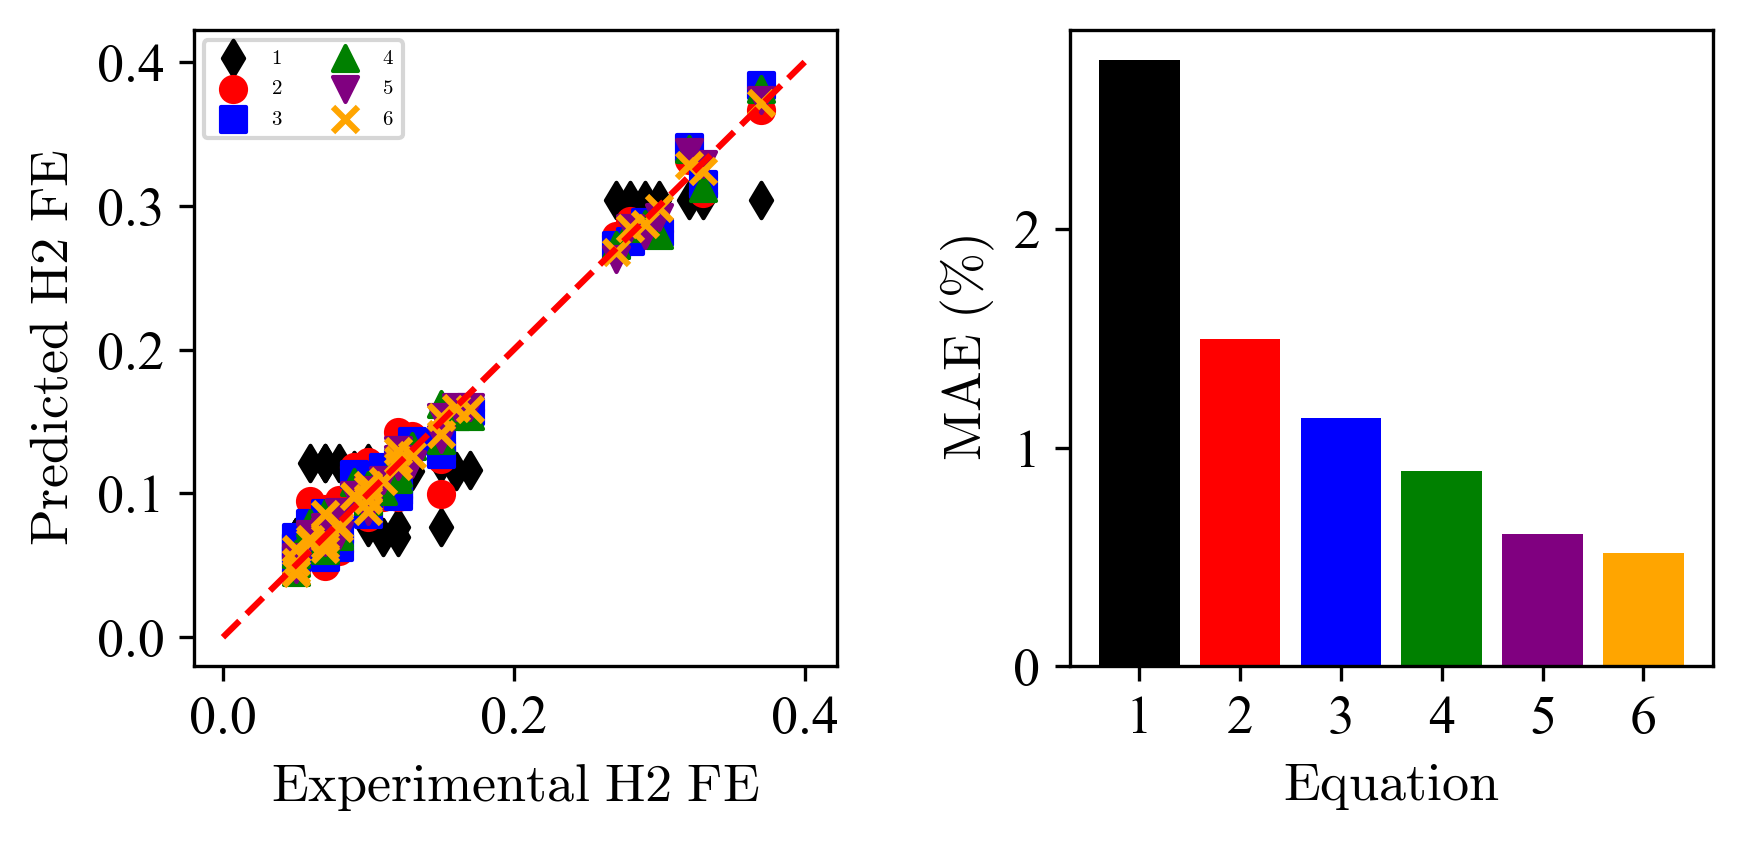

In [16]:
plot_data(data, metric=percentage_mae, metric_name='MAE', name='H2', pred_name='H2_pred', title='H2', figsize=(6, 4))

Text(0, 0.5, '$\\rm Predicted \\ H2 \\ FE$')

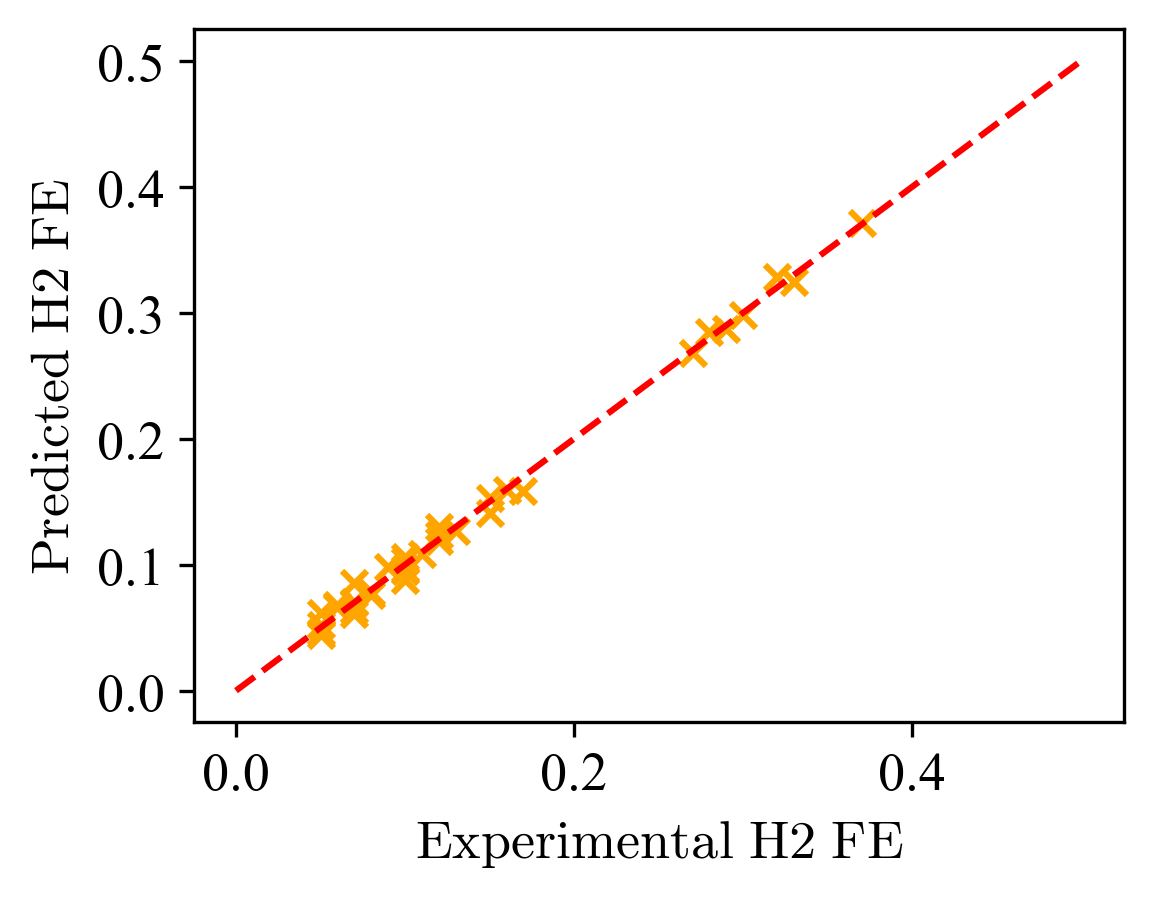

In [17]:
plt.figure(figsize=(4, 3))
plt.scatter(data['H2'], data['H2_pred_6'], label=r'$\rm Eqn 6$', marker='x', color='orange')
plt.plot([0, 0.5], [0, 0.5], color='red', linestyle='--')

plt.xlabel(r'$\rm Experimental \ H2 \ FE$')
plt.ylabel(r'$\rm Predicted \ H2 \ FE$')

# plt.legend()